In [1]:
import torch.nn as nn
import torch
import pandas as pd
import numpy as np

In [2]:
size = 500

X1 = np.arange(0.0, float(size))
X2 = np.random.rand(size)

y = (X1 < size//2).astype(np.int16)

In [3]:
X1.shape, X2.shape, y.shape

((500,), (500,), (500,))

In [4]:
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

In [5]:
df.head()

,X1,X2,y
0,0.0,0.491085,1
1,1.0,0.864459,1
2,2.0,0.221759,1
3,3.0,0.215334,1
4,4.0,0.239084,1


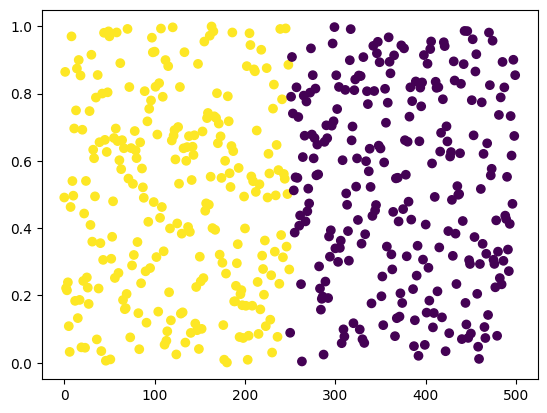

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df.X1, df.X2, c=df.y)

plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("y", axis=1), df['y'], test_size=0.2)

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.ReLU(),
            nn.Linear(in_features=5, out_features=1)
        )

    def forward(self, x: torch.Tensor):
        return self.seq(x)

In [10]:
torch.manual_seed(42)
model = ClassificationModel()

loss = nn.BCEWithLogitsLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01)

In [11]:
X_train = torch.from_numpy( X_train ).type(torch.float32)
X_test = torch.from_numpy( X_test ).type(torch.float32)
y_train = torch.from_numpy( y_train ).type(torch.float32)
y_test = torch.from_numpy( y_test ).type(torch.float32)

In [12]:
epochs = 100
train_costs = []
test_costs = []

for epoch in range(epochs):
    optim.zero_grad()
    
    y_pred = model(X_train).squeeze()

    train_cost = loss(y_pred, y_train)
    train_cost.backward()
    train_costs.append(train_cost.item())

    optim.step()

    with torch.no_grad():
        test_cost = loss(model(X_test).squeeze(), y_test)
        test_costs.append(test_cost.item())

Train Cost: 0.6986530423164368, Test Cost: 0.7010505795478821


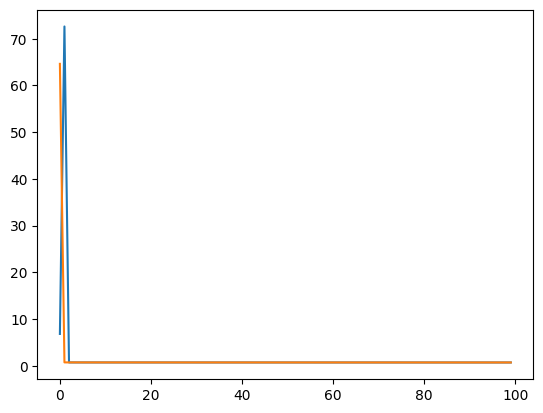

In [13]:
print(f"Train Cost: {train_cost}, Test Cost: {test_cost}")
plt.plot(np.arange(len(train_costs)), train_costs)
plt.plot(np.arange(len(test_costs)), test_costs)
plt.show()

In [14]:
model( torch.tensor([210.0, 4.0]) ).softmax(dim=0).argmax(dim=0)

tensor(0)

In [15]:
model(X_train).detach()

tensor([[-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.2797],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.1618],
        [-0.